# McKinney Chapter 5 - Practice for Section 03

## Announcements

1. No DataCamp this week, but I suggest you keep working on it
2. Keep forming groups, and I will post our first project early next week

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

pandas provides two *very useful* data structures:

1. Data frames are like a worksheet in an Excel workbook (2-D, mixed data type)
2. Series are like a column in a worksheet in an Excel workbook (1-D, one data type)

In [3]:
np.random.seed(42)
df = pd.DataFrame(
    data=np.random.randn(4, 4),
    index=list('ABCD'),
    columns=list('abcd')
)

df

,a,b,c,d
A,0.4967,-0.1383,0.6477,1.5230
B,-0.2342,-0.2341,1.5792,0.7674
C,-0.4695,0.5426,-0.4634,-0.4657
D,0.2420,-1.9133,-1.7249,-0.5623


How can we slice the first two rows and three columns?
We can slice data frames two ways:

1. Using integer locations and the `.iloc[]` method
2. Using row and column names with the `.loc[]` method

In [4]:
df.iloc[:2, :3] # slice with j,k notation, like NumPy

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2342,-0.2341,1.5792


***When we slice by names or labels, we get both left and right edges included!***

In [5]:
df.loc['A':'B', 'a':'c']

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2342,-0.2341,1.5792


We can easily add columns!

In [6]:
df['e'] = 5 # broadcasts to every row in df

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,5
B,-0.2342,-0.2341,1.5792,0.7674,5
C,-0.4695,0.5426,-0.4634,-0.4657,5
D,0.2420,-1.9133,-1.7249,-0.5623,5


In [7]:
df['e'] = np.random.randn(4)

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,-1.0128
B,-0.2342,-0.2341,1.5792,0.7674,0.3142
C,-0.4695,0.5426,-0.4634,-0.4657,-0.9080
D,0.2420,-1.9133,-1.7249,-0.5623,-1.4123


A series is the other, 1-D data structure in pandas!

In [8]:
ser = pd.Series(data=np.arange(2.), index=['C', 'D']) # the . in np.arange() makes the array floats

ser

C   0.0000
D   1.0000
dtype: float64

In [9]:
df['f'] = ser

df

,a,b,c,d,e,f
A,0.4967,-0.1383,0.6477,1.5230,-1.0128,NaN
B,-0.2342,-0.2341,1.5792,0.7674,0.3142,NaN
C,-0.4695,0.5426,-0.4634,-0.4657,-0.9080,0.0000
D,0.2420,-1.9133,-1.7249,-0.5623,-1.4123,1.0000


## Practice

In [10]:
tickers = 'AAPL IBM MSFT GOOG'
prices = yf.download(tickers=tickers)

[*********************100%%**********************]  4 of 4 completed


In [11]:
returns = (
    prices['Adj Close'] # slice adj close column
    .iloc[:-1] # drop last row with intra day prices, which are sometimes missing
    .pct_change() # calculate returns
    .dropna() # drop leading rows with at least one missing value
)

returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0030
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2024-01-26,-0.0090,0.0010,-0.0158,-0.0023
2024-01-29,-0.0036,0.0068,-0.0015,0.0143
2024-01-30,-0.0192,-0.0116,0.0039,-0.0028


### What are the mean daily returns for these four stocks?

In [12]:
returns.mean() # default axis=0 takes the mean of each column

AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

If we pass `axis=1`, we get the mean return on each day.
We can this an "equally-weighted portfolio return."
$$r_{p,t} = \sum_{i=0}^4 \frac{1}{4} r_{i, t}$$

In [13]:
returns.mean(axis=1)

Date
2004-08-20    0.0224
2004-08-23    0.0041
2004-08-24   -0.0032
2004-08-25    0.0152
2004-08-26    0.0146
               ...  
2024-01-26   -0.0065
2024-01-29    0.0040
2024-01-30   -0.0074
2024-01-31   -0.0356
2024-02-01    0.0132
Length: 4896, dtype: float64

### What are the standard deviations of daily returns for these four stocks?

pandas calcualates sample statistics by default.

In [14]:
returns.std()

AAPL   0.0206
GOOG   0.0194
IBM    0.0143
MSFT   0.0171
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

We annualize mean returns by multiplying by $T$ ($T=252$ for daily returns, $T=12$ for month returns, and so on).
We annualize standard deviations by multiplying by $\sqrt(T)$.

In [15]:
returns.mean().mul(252)

AAPL   0.3625
GOOG   0.2552
IBM    0.0980
MSFT   0.2002
dtype: float64

In [16]:
returns.std().mul(np.sqrt(252))

AAPL   0.3276
GOOG   0.3074
IBM    0.2272
MSFT   0.2722
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

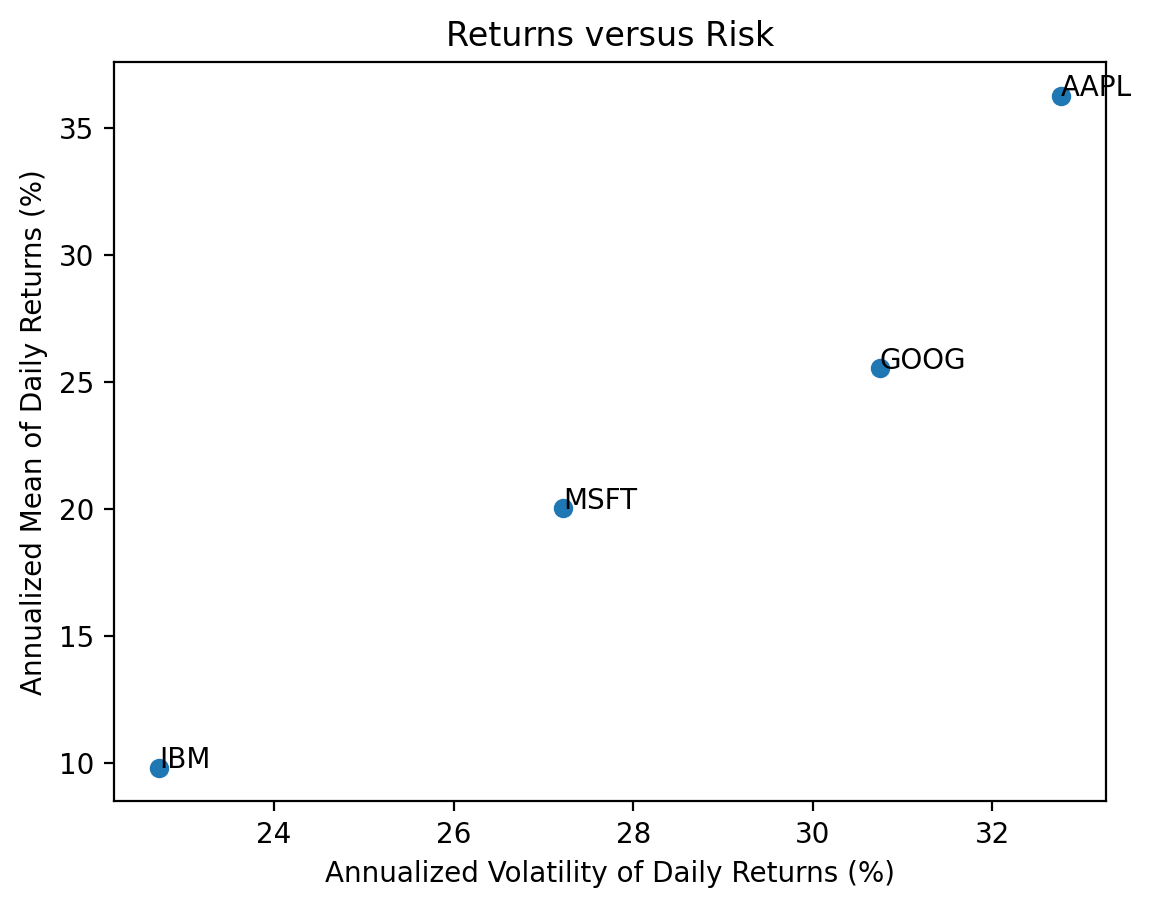

In [17]:
vols = returns.std().mul(np.sqrt(252) * 100)
means = returns.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means
)

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

plt.title('Returns versus Risk')
plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

In [18]:
url2 = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
wiki2 = pd.read_html(io=url2)
tickers2 = wiki2[1]['Symbol'].to_list()
tickers2[:5]

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA']

In [19]:
prices2 = yf.download(tickers=tickers2)

[*********************100%%**********************]  30 of 30 completed


In [20]:
returns2 = (
    prices2['Adj Close'] # slide adj close for all stocks
    .iloc[:-1] # drop last day of adj close, which are intraday values before 4 PM
    .pct_change() # calculate returns
    .dropna() # drop any dates with incomplete data
)

returns2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-21,0.0368,0.0040,0.0095,-0.0092,0.0079,0.0210,0.0128,0.0094,-0.0121,-0.0165,...,0.0106,0.0230,0.0152,0.0076,0.0231,0.0061,0.0133,0.0108,0.0129,0.0043
2019-03-22,-0.0207,-0.0270,-0.0211,-0.0283,-0.0320,-0.0326,-0.0222,-0.0220,-0.0040,-0.0078,...,-0.0080,-0.0264,-0.0661,-0.0081,0.0039,-0.0196,-0.0175,0.0252,-0.0187,-0.0079
2019-03-25,-0.0121,-0.0006,-0.0038,0.0229,0.0124,-0.0038,-0.0002,-0.0016,-0.0041,0.0113,...,0.0007,0.0052,0.0017,0.0030,0.0004,-0.0009,-0.0003,0.0054,-0.0115,-0.0011
2019-03-26,-0.0103,0.0090,0.0042,-0.0002,0.0035,-0.0092,0.0095,0.0101,0.0218,-0.0061,...,0.0069,0.0021,0.0128,0.0104,0.0002,-0.0141,0.0148,0.0092,0.0037,0.0015
2019-03-27,0.0090,-0.0104,-0.0047,0.0103,-0.0049,-0.0269,-0.0017,-0.0108,0.0013,0.0256,...,-0.0076,-0.0097,-0.0035,-0.0012,0.0102,-0.0069,-0.0070,0.0041,0.0050,-0.0113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-26,-0.0090,0.0049,0.0710,0.0178,-0.0045,0.0033,-0.0036,0.0038,0.0053,-0.0160,...,0.0057,-0.0023,0.0196,0.0033,-0.0004,0.0199,-0.0171,0.0026,-0.0113,0.0088
2024-01-29,-0.0036,0.0054,-0.0028,-0.0014,0.0128,0.0283,0.0029,-0.0004,0.0223,0.0002,...,0.0038,0.0143,0.0110,0.0001,-0.0015,0.0027,0.0213,-0.0083,-0.0057,0.0047
2024-01-30,-0.0192,0.0037,0.0164,-0.0231,0.0050,-0.0005,-0.0010,0.0070,-0.0056,0.0074,...,0.0031,-0.0028,0.0029,0.0085,0.0115,-0.0018,0.0128,0.0100,0.0018,0.0033


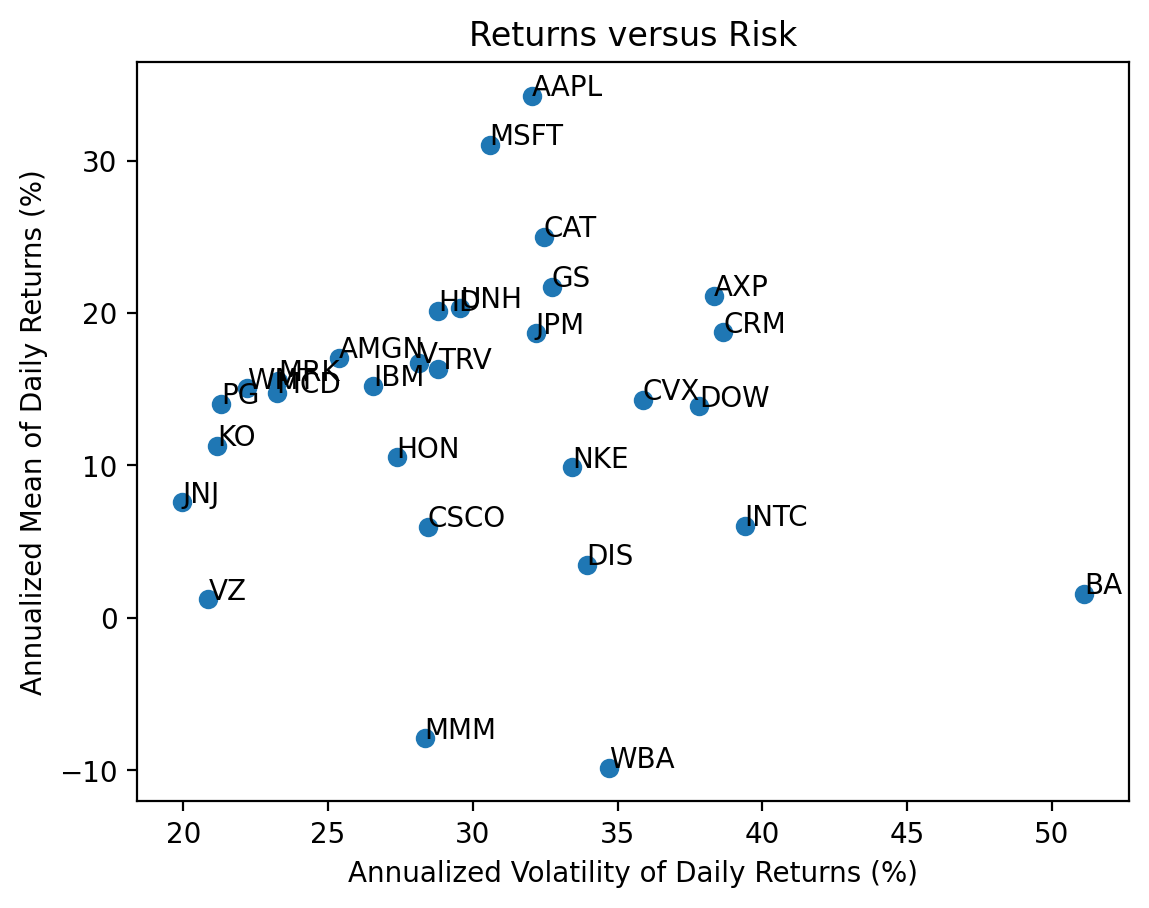

In [21]:
vols = returns2.std().mul(np.sqrt(252) * 100)
means = returns2.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means
)

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

plt.title('Returns versus Risk')
plt.show()

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

In [22]:
total_returns2 = returns2.add(1).prod().sub(1)

total_returns2.iloc[:5]

AAPL    3.1210
AMGN    0.9635
AXP     0.9687
BA     -0.4289
CAT     1.6083
dtype: float64

In [23]:
np.allclose(((returns2 + 1).prod() - 1), total_returns2)

True

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

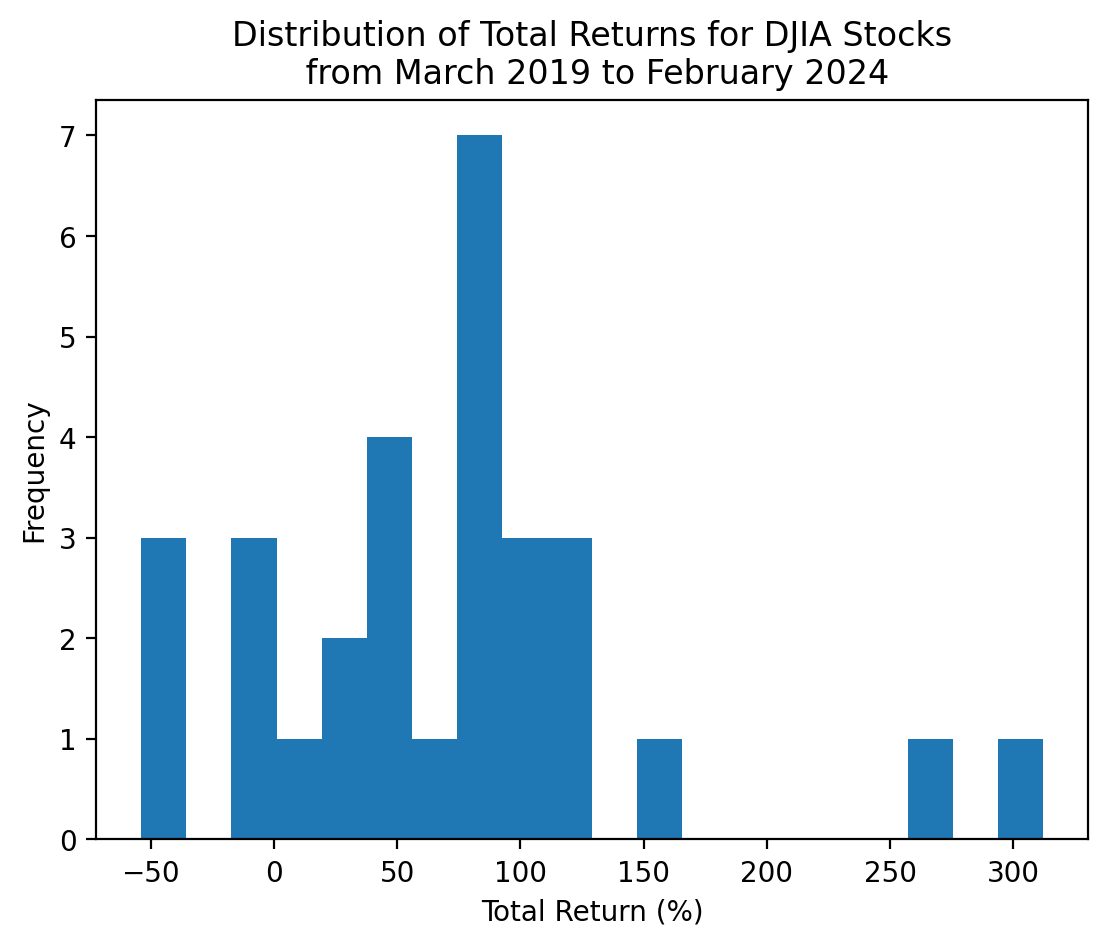

In [24]:
start_date = returns2.index.min()
stop_date = returns2.index.max()

(
    returns2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .plot(kind='hist', bins=20)
)
plt.xlabel('Total Return (%)')
plt.title(f'Distribution of Total Returns for DJIA Stocks\n from {start_date:%B %Y} to {stop_date:%B %Y}')
plt.show()

With only 30 stocks, we can visualize and interpret each stock separately!

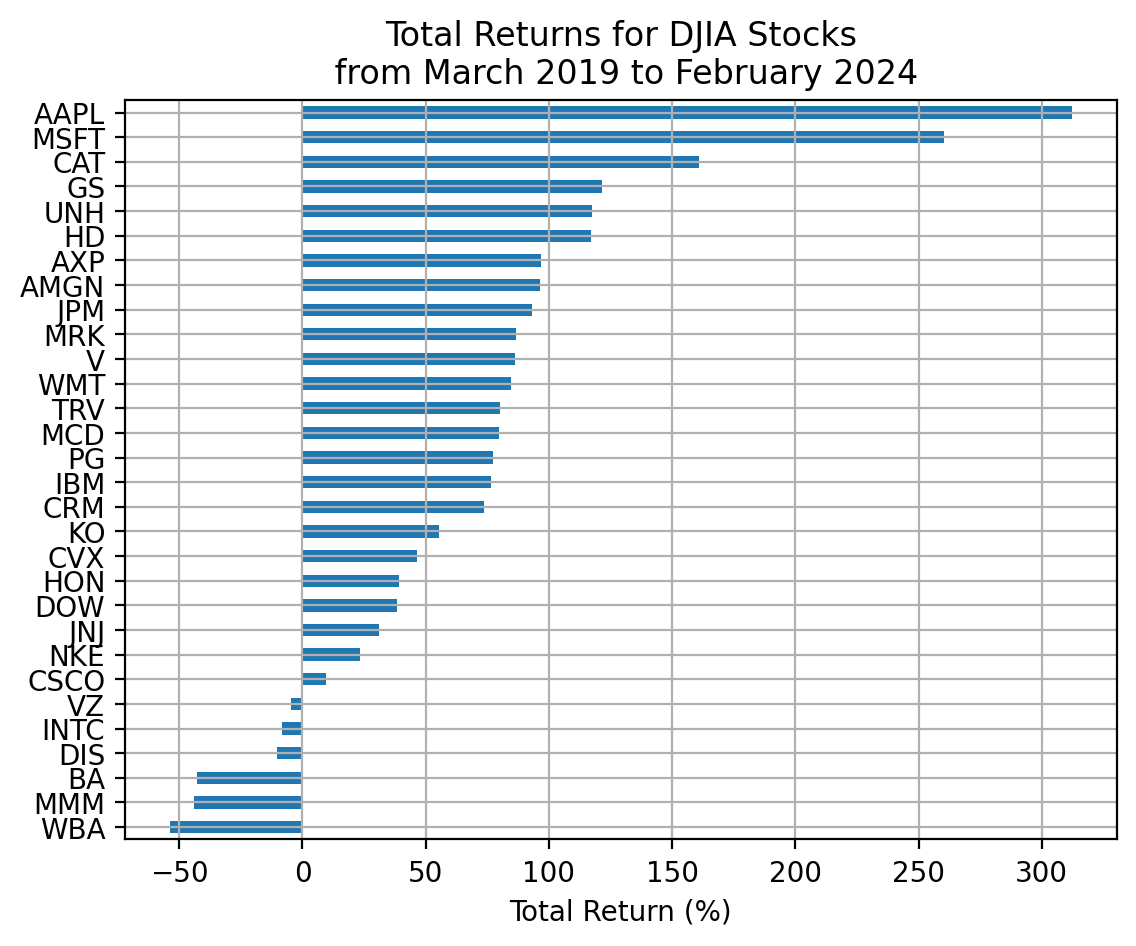

In [25]:
start_date = returns2.index.min()
stop_date = returns2.index.max()

(
    returns2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .sort_values()
    .plot(kind='barh', grid=True)
)
plt.xlabel('Total Return (%)')
plt.title(f'Total Returns for DJIA Stocks\n from {start_date:%B %Y} to {stop_date:%B %Y}')
plt.show()

### Which stocks have the minimum and maximum total returns?

If we want the *values*, the `.min()` and `.max()` methods are the way to go!

In [26]:
total_returns2.min()

-0.5384

In [27]:
total_returns2.max()

3.1210

The `.min()` and `.max()` methods give the values but not the tickers (or index).
We use the `.idxmin()` and `.idxmax()` to get the tickers (or index).

In [28]:
total_returns2.idxmin()

'WBA'

In [29]:
total_returns2.idxmax()

'AAPL'

Here is what I would use!

In [30]:
total_returns2.sort_values().iloc[[0, -1]]

WBA    -0.5384
AAPL    3.1210
dtype: float64

Not the exactly right tool here, but the `.nsmallest()' and `.nlargest()` methods are really useful!

In [31]:
total_returns2.nsmallest(3)

WBA   -0.5384
MMM   -0.4408
BA    -0.4289
dtype: float64

In [32]:
total_returns2.nlargest(3)

AAPL   3.1210
MSFT   2.6028
CAT    1.6083
dtype: float64

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

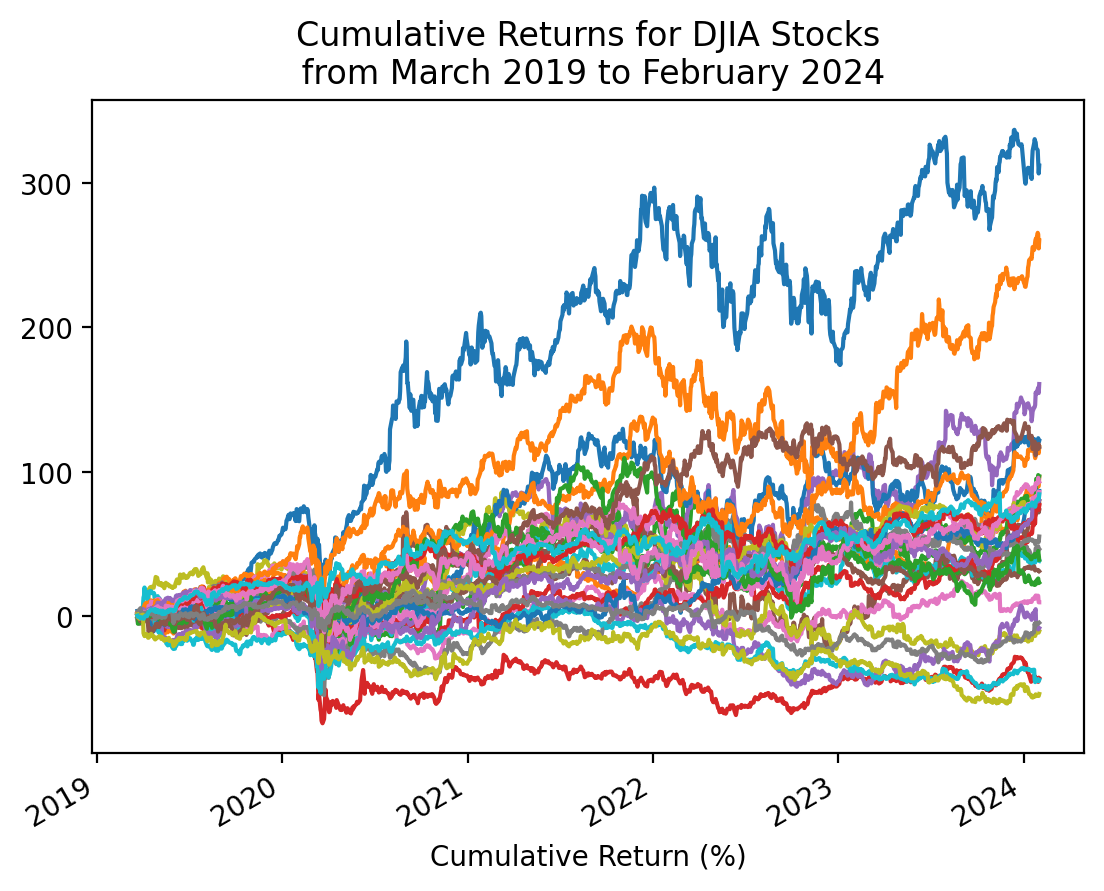

In [33]:
start_date = returns2.index.min()
stop_date = returns2.index.max()

(
    returns2
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot(legend=False)
)
plt.xlabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for DJIA Stocks\n from {start_date:%B %Y} to {stop_date:%B %Y}')
plt.show()

### Repeat the plot above with only the minimum and maximum total returns

In [34]:
total_returns2.sort_values().iloc[[0, -1]].index

Index(['WBA', 'AAPL'], dtype='object')

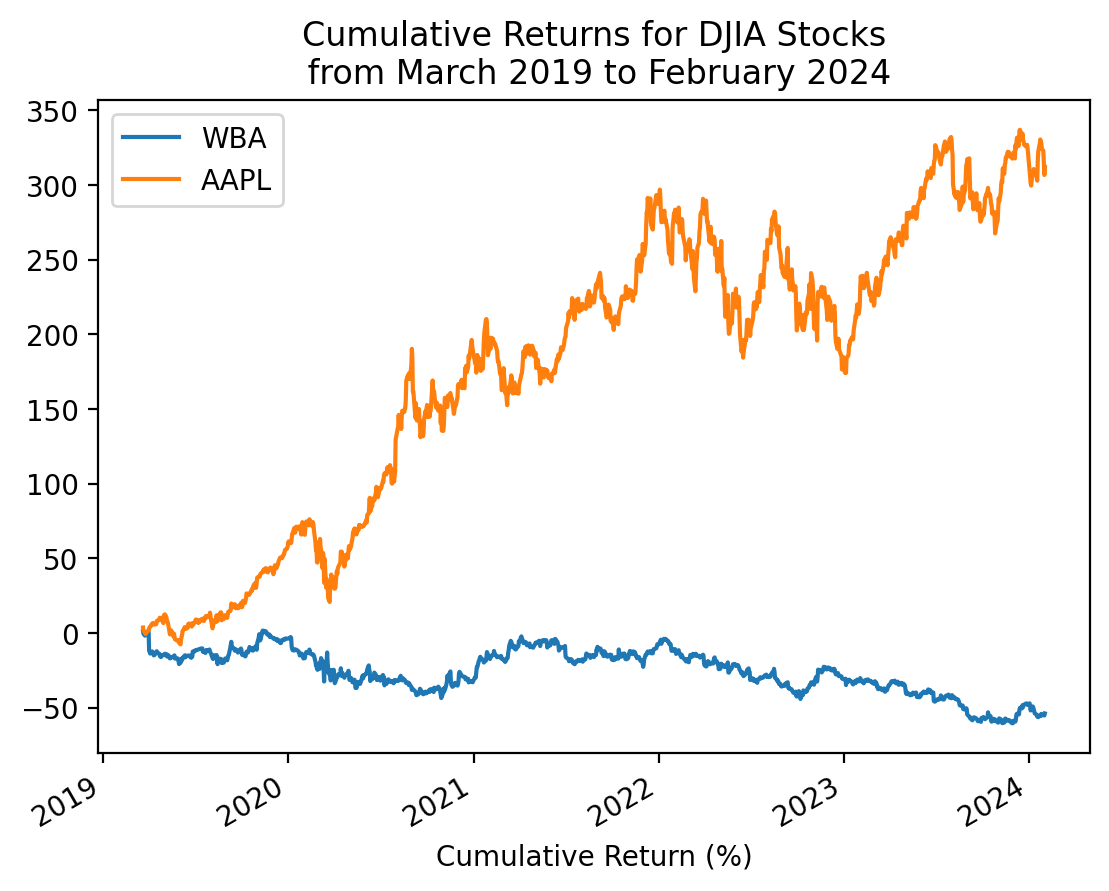

In [35]:
start_date = returns2.index.min()
stop_date = returns2.index.max()

(
    returns2[total_returns2.sort_values().iloc[[0, -1]].index]
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.xlabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for DJIA Stocks\n from {start_date:%B %Y} to {stop_date:%B %Y}')
plt.show()